In [1]:
Build the Image classification model by dividing the model into following 4 stages: 
a. Loading and preprocessing the image data 
b. Defining the model’s architecture 
c. Training the model 
d. Estimating the model’s performance

SyntaxError: invalid character '’' (U+2019) (11931458.py, line 3)

In [2]:
# Import packages

In [50]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten, MaxPooling2D

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
#Loading dataset

In [53]:
(x_train, y_train),(x_test,y_test)=cifar10.load_data()

In [54]:
# Preprocessing Dataset

In [55]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


In [56]:
#Normalization 

In [57]:
x_train = x_train/255.0
x_test=x_test/255.0

In [58]:
# Define model Architecture

In [59]:
model=Sequential()
model.add(Conv2D(28, (3,3), input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2), )
model.add(Flatten())
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [60]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 28)          │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 15, 15, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 6300)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 200)                 │       1,260,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,262,994 (4.82 MB)

 Trainable params: 1,262,994 (4.82 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Compile

In [69]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [70]:
# Train model

In [81]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6999 - loss: 0.8749
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7585 - loss: 0.7029
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8136 - loss: 0.5499
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8514 - loss: 0.4336
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8902 - loss: 0.3305


In [82]:
# Evaluate
test_loss, test_acc= model.evaluate(x_test, y_test)
print("loss=%d" %test_loss)
print("accuracy=%d" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6341 - loss: 1.3496
loss=1
accuracy=0


In [83]:
# showing image

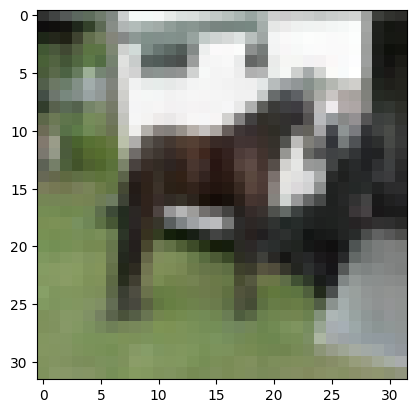

In [84]:

plt.imshow(np.squeeze(x_test[20]),cmap='grey')
plt.show()

In [85]:
# Predicting 
image=x_train[0]

In [86]:
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict= model.predict([image])
print("Predicted Photo=", format(np.argmax(predict)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Photo= 6
